In [1]:
#2.	(PRATHIMA) How do data science role salaries vary by geographic location? 
# How do data science role salaries vary by company size? 
# How do data science role salaries vary by employee experience level?

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
ds_salaries_df = pd.read_csv("Resources/ds_salaries.csv")
del ds_salaries_df["Unnamed: 0"]

ds_renamed_df = ds_salaries_df.rename(columns={"work_year":"Work Year",
                                              "experience_level":"Experience Level",
                                              "employment_type":"Employment Type",
                                              "job_title":"Job Title",
                                              "salary":"Salary",
                                              "salary_currency":"Salary Currency",
                                              "salary_in_usd": "Salary in USD",
                                              "employee_residence":"Employee Residence",
                                              "remote_ratio":"Remote Ratio",
                                              "company_location":"Company Location",
                                              "company_size":"Company Size"})

ds_renamed_df

,Work Year,Experience Level,Employment Type,Job Title,Salary,Salary Currency,Salary in USD,Employee Residence,Remote Ratio,Company Location,Company Size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [4]:
#ds_renamed_df.info({"Work Year": work_year, 
#                   "Experience Level": experience_level,
#                    "Employment Type" : employment_type,
#                   "Job Title" : job_title,
#                   "Salary" : salary,
#                   "Salary Currency" : salary_currency,
#                    "Salary in USD" : salary_in_usd,
#                    "Employee Residence" : employee_residence,
#                    "Remote Ratio" : remote_ratio,
#                    "Company Location" : company_location,
#                    "Company Size" : company_size}
  #              )

In [5]:
ds_renamed_df.describe()

,Work Year,Salary,Salary in USD,Remote Ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
#checking unique values in different variables

a = ds_renamed_df.nunique()

pd.DataFrame(a , columns = ["unique values"] )

,unique values
Work Year,3
Experience Level,4
Employment Type,4
Job Title,50
Salary,272
Salary Currency,17
Salary in USD,369
Employee Residence,57
Remote Ratio,3
Company Location,50


In [7]:
ds_renamed_df["Remote Ratio"].value_counts()

100    381
0      127
50      99
Name: Remote Ratio, dtype: int64

In [8]:
#checking columns
ds_renamed_df.columns

Index(['Work Year', 'Experience Level', 'Employment Type', 'Job Title',
       'Salary', 'Salary Currency', 'Salary in USD', 'Employee Residence',
       'Remote Ratio', 'Company Location', 'Company Size'],
      dtype='object')

In [9]:
#How do data science role salaries vary by geographic location? 
ds_renamed_df["Job Title"].value_counts()



Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

AxesSubplot(0.125,0.125;0.775x0.755)


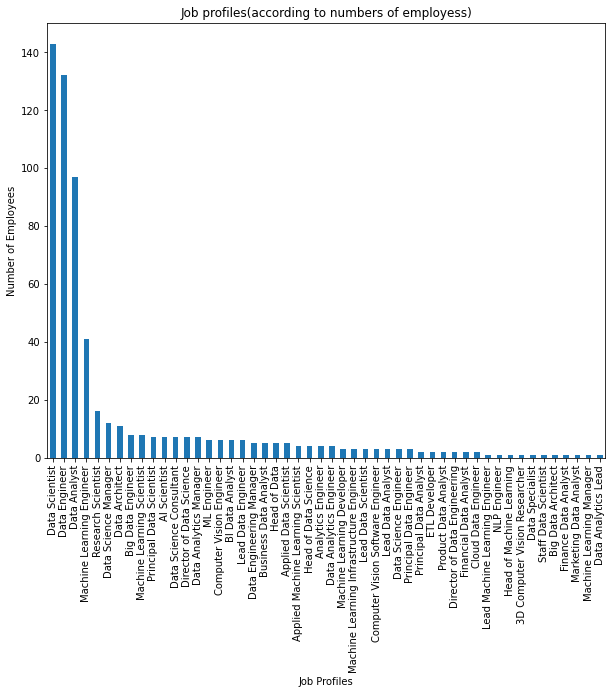

In [10]:

print(ds_renamed_df["Job Title"].value_counts().plot(kind='bar', title='Job profiles(according to numbers of employess)', xlabel='Job Profiles', ylabel='Number of Employees', figsize=(10,8)))

In [11]:
# grouping the company_location variable acording to thier reginol location 
#and making new variable company_regions

# North America
a = ds_renamed_df["Company Location"].replace(dict.fromkeys(["US","CA","MX","AS","HN"] , "North America"))

#Europe
b = a.replace(dict.fromkeys(['GB','DE','FR','IT','RU','RO','NL','HU','ES','GR','AT','PT','PL','LU','DK','CZ','SI','CH','BE','EE','IE','VA','MD','MT','UA','HR'] , "Europe"))

#South America
c = b.replace(dict.fromkeys(['BR','CL','CO'] , "South America"))

#Africa
d = c.replace(dict.fromkeys(['NG','KE','DZ'] , "Africa"))

#Oceania 
e = d.replace(dict.fromkeys(['NZ','AU'] , "Oceania"))

#Asia
ds_renamed_df["Company Continent"] = e.replace(dict.fromkeys(['IN','JP','PK','TR','CN','AE','VN','MY','SG','IR','IL','IQ'] , "Asia"))


In [12]:
#checking value counts of new variable company_regions
ds_renamed_df["Company Continent"].value_counts()

North America    390
Europe           157
Asia              47
South America      5
Oceania            4
Africa             4
Name: Company Continent, dtype: int64

In [13]:
ds_renamed_df


,Work Year,Experience Level,Employment Type,Job Title,Salary,Salary Currency,Salary in USD,Employee Residence,Remote Ratio,Company Location,Company Size,Company Continent
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Europe
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Asia
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Europe
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,North America
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,North America
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,North America
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,North America
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,North America


In [14]:
# North America
a = ds_renamed_df["Employee Residence"].replace(dict.fromkeys(["PR","US","CA","MX","AS","HN"] , "North America"))

#Europe
b = a.replace(dict.fromkeys(['JE','RS','GB','DE','FR','IT','RU','RO','NL','HU','ES','GR','AT','PT','PL','LU','DK','CZ','SI','CH','BE','EE','IE','VA','MD','MT','UA','HR','BG'] , "Europe"))

#South America
c = b.replace(dict.fromkeys(['BO','AR','BR','CL','CO'] , "South America"))

#Africa
d = c.replace(dict.fromkeys(['TN','NG','KE','DZ'] , "Africa"))

#Oceania 
e = d.replace(dict.fromkeys(['NZ','AU'] , "Oceania"))

#Asia
ds_renamed_df["Employee Continent"] = e.replace(dict.fromkeys(['HK','IN','JP','PK','TR','CN','AE','VN','MY','SG','IR','IL','IQ','PH'] , "Asia"))


In [15]:
ds_renamed_df["Employee Continent"].value_counts()

North America    365
Europe           163
Asia              60
South America     10
Africa             5
Oceania            4
Name: Employee Continent, dtype: int64

In [16]:
ds_renamed_df

,Work Year,Experience Level,Employment Type,Job Title,Salary,Salary Currency,Salary in USD,Employee Residence,Remote Ratio,Company Location,Company Size,Company Continent,Employee Continent
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Europe,Europe
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Asia,Asia
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Europe,Europe
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,North America,North America
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,North America,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,North America,North America
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,North America,North America
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,North America,North America
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,North America,North America


In [17]:
#droping employee_residence variable
#ds_renamed_df.drop("Employee Residence")
#block.pop('NAME')
#print("\nData frame after deleting the column 'Employee residence':\n")
#print(ds_renamed_df)

In [18]:
#ds_renamed_df.job_title.unique()

In [19]:
# How do data science role salaries vary by company size?


In [20]:
ds_salaries_df.job_title.nunique()
#split2=df.groupby(["Job Title","County Location"])

50

In [21]:
split2=ds_salaries_df.groupby(["job_title","company_location"])
#split2=list(split2)
len(split2)

179

In [22]:
remote_ratio = ds_renamed_df.groupby(["Remote Ratio"])

salary_mean = remote_ratio["Salary in USD"].mean()
salary_median = remote_ratio["Salary in USD"].median()
salary_var = remote_ratio["Salary in USD"].var()
salary_std = remote_ratio["Salary in USD"].std()

salary_remote_summary_df = pd.DataFrame({"Mean": salary_mean,
                         "Median": salary_median,
                         "Variance": salary_var,
                         "Std Deviation": salary_std
                          })
salary_remote_summary_df

,Mean,Median,Variance,Std Deviation
Remote Ratio,,,,
0,106354.622047,99000.0,4.586613e+09,67724.540800
50,80823.030303,69999.0,3.289377e+09,57353.093614
100,122457.454068,115000.0,5.286867e+09,72710.843718


Text(0.5, 1.0, 'Distribution of Employee Working from Home vs Office')

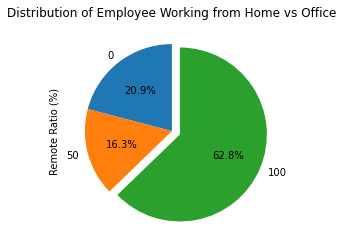

In [23]:
labels = ["0", "50", "100"]
sizes = [127, 99, 381]
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        startangle=90)
plt.ylabel("Remote Ratio (%)")
plt.title("Distribution of Employee Working from Home vs Office")


Text(0.5, 1.0, 'Employee Salary vs Work from Home')

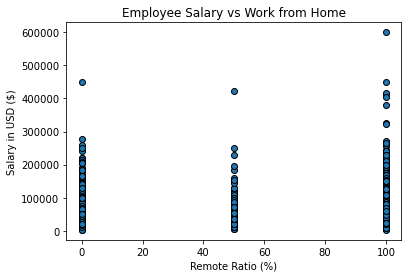

In [24]:
plt.scatter(ds_renamed_df["Remote Ratio"], ds_renamed_df["Salary in USD"], edgecolor = "black")
plt.xlabel("Remote Ratio (%)")
plt.ylabel("Salary in USD ($)")
plt.title("Employee Salary vs Work from Home")